In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-p80__3cs because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [52]:
m0_scale    = 14
m0_min      = 2.4
m0_max      = 16
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# ---- mass_trainer_aToTauTau_m1p2To17p2_v2_5ch ---

# U to 2tau validation sample

loaded data file ------>  ..//mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch11_val_pseudoscalar_mae2.0274_inference_data.pkl
E2E MAE   : 2.3352908679793685
PF MAE   : 4.166621155411263


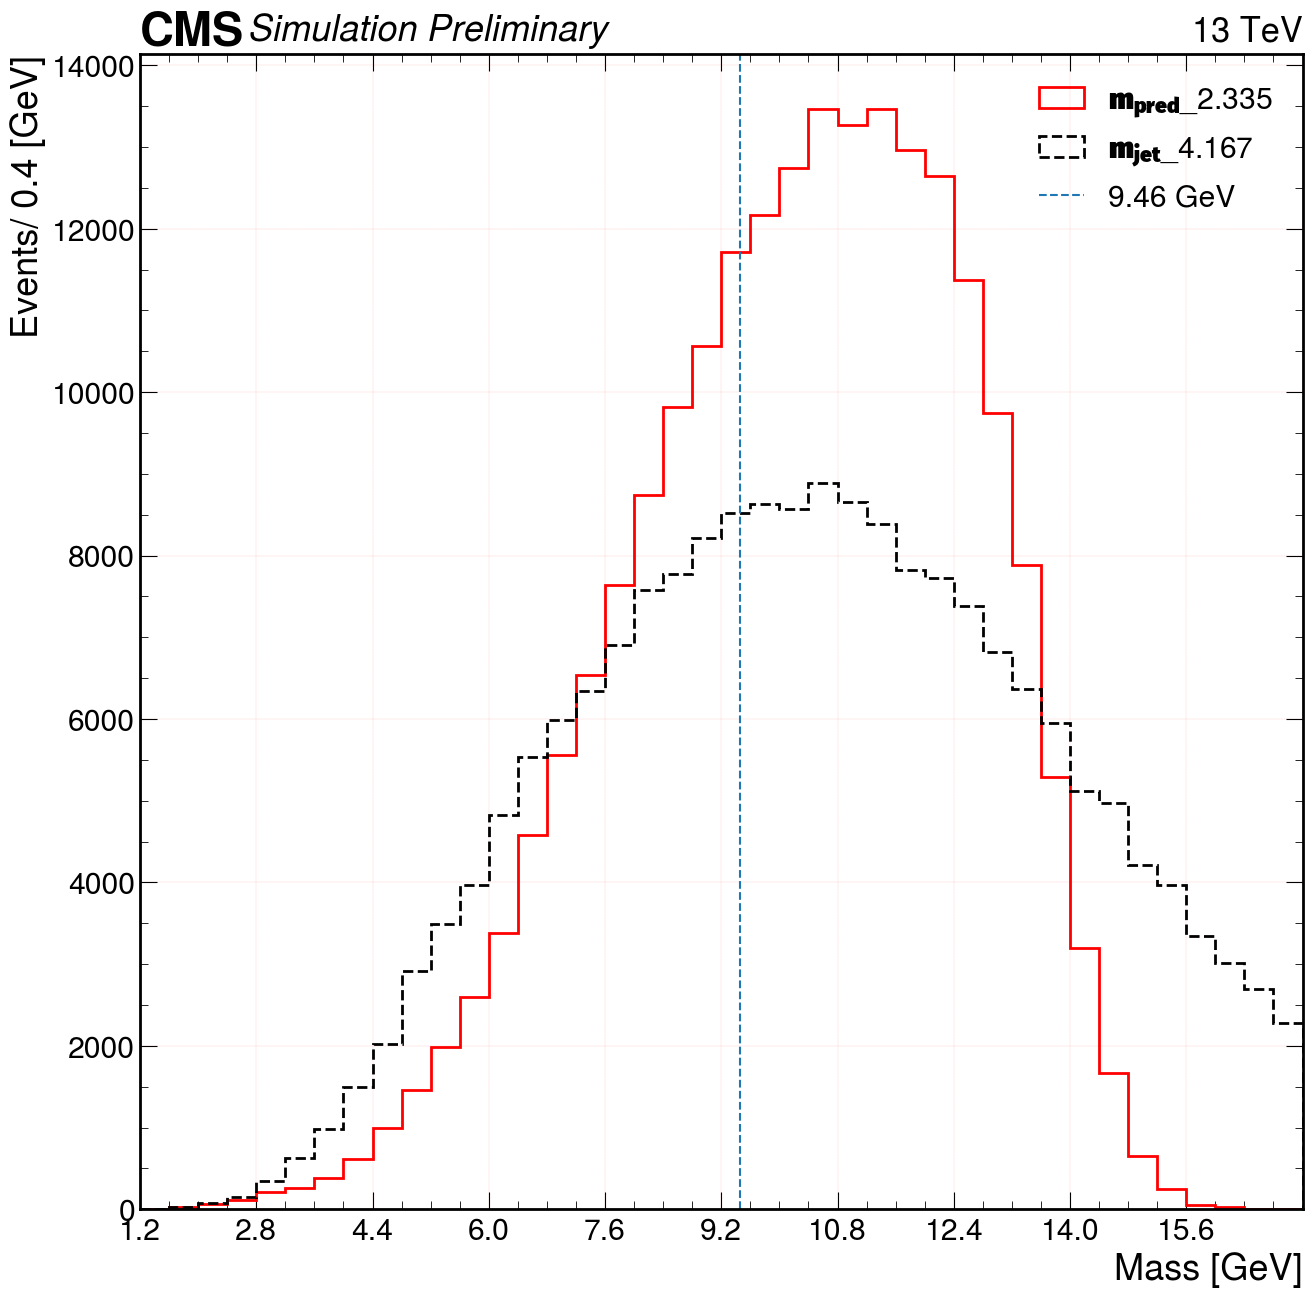

In [55]:
data_file = "..//mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch11_val_pseudoscalar_mae2.0274_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal Mass = 3.7 GeV

In [ ]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 3.7linestyle='--',label=f'3.7 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal Mass = 4 GeV

In [ ]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 4,linestyle='--',label=f'4 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal Mass = 4 GeV

In [ ]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 5,linestyle='--',label=f'5 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal Mass = 6 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl
E2E MAE   : 2.0039457761161046
PF MAE   : 3.751295138031446


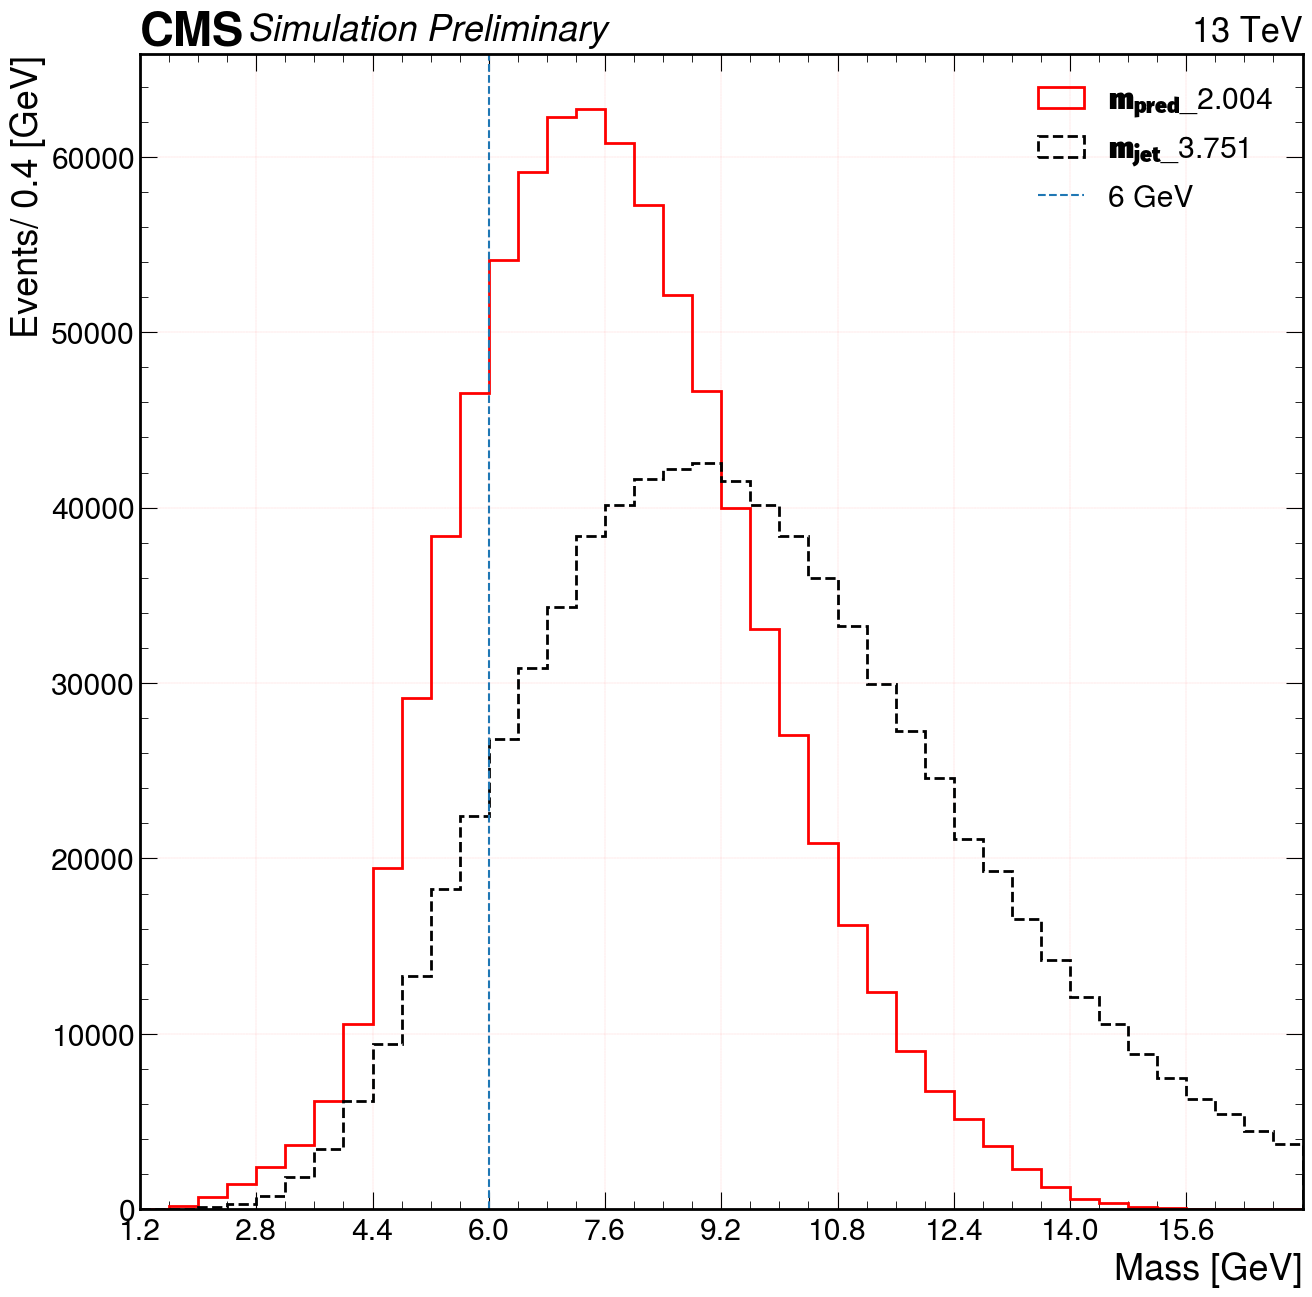

In [56]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 6,linestyle='--',label=f'6 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass= 8 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1182_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


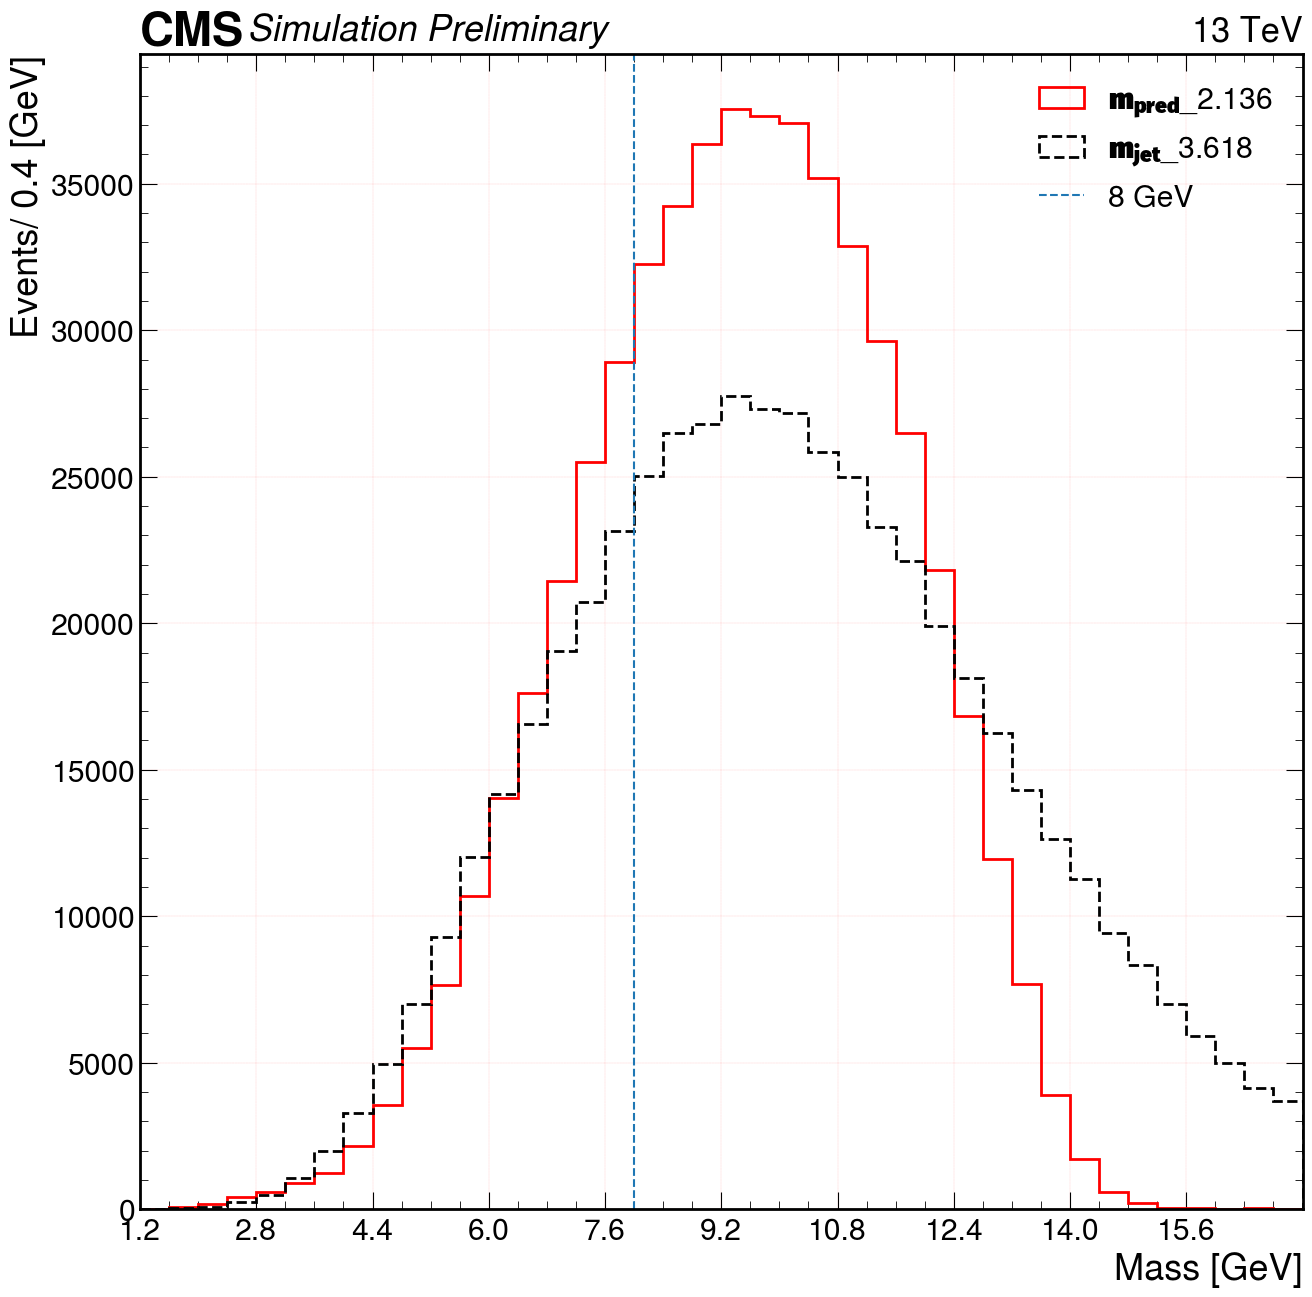

In [57]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1182_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 8,linestyle='--',label=f'8 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass =10 Gev

loaded data file ------>  ..//mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.9849_inference_data.pkl
E2E MAE   : 2.256538434952163
PF MAE   : 3.8204563141591112


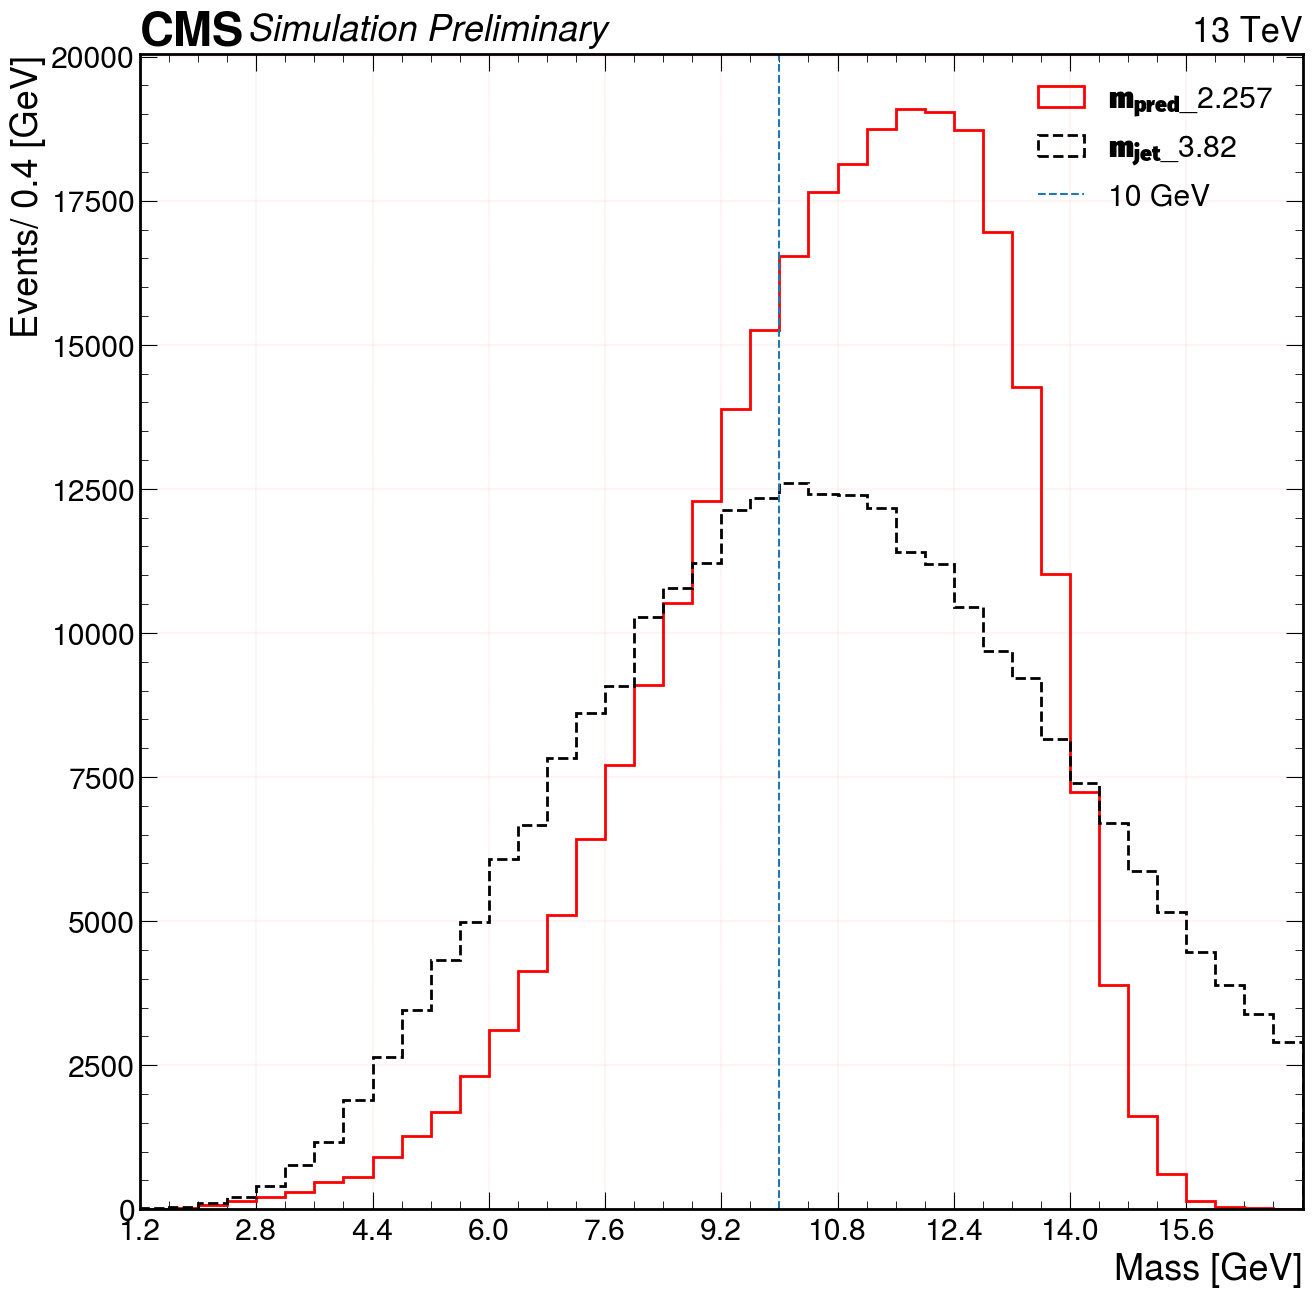

In [58]:
data_file = "..//mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.9849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 10,linestyle='--',label=f'10 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal M = 12 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8464_inference_data.pkl
E2E MAE   : 2.3226076099685207
PF MAE   : 4.359748450217046


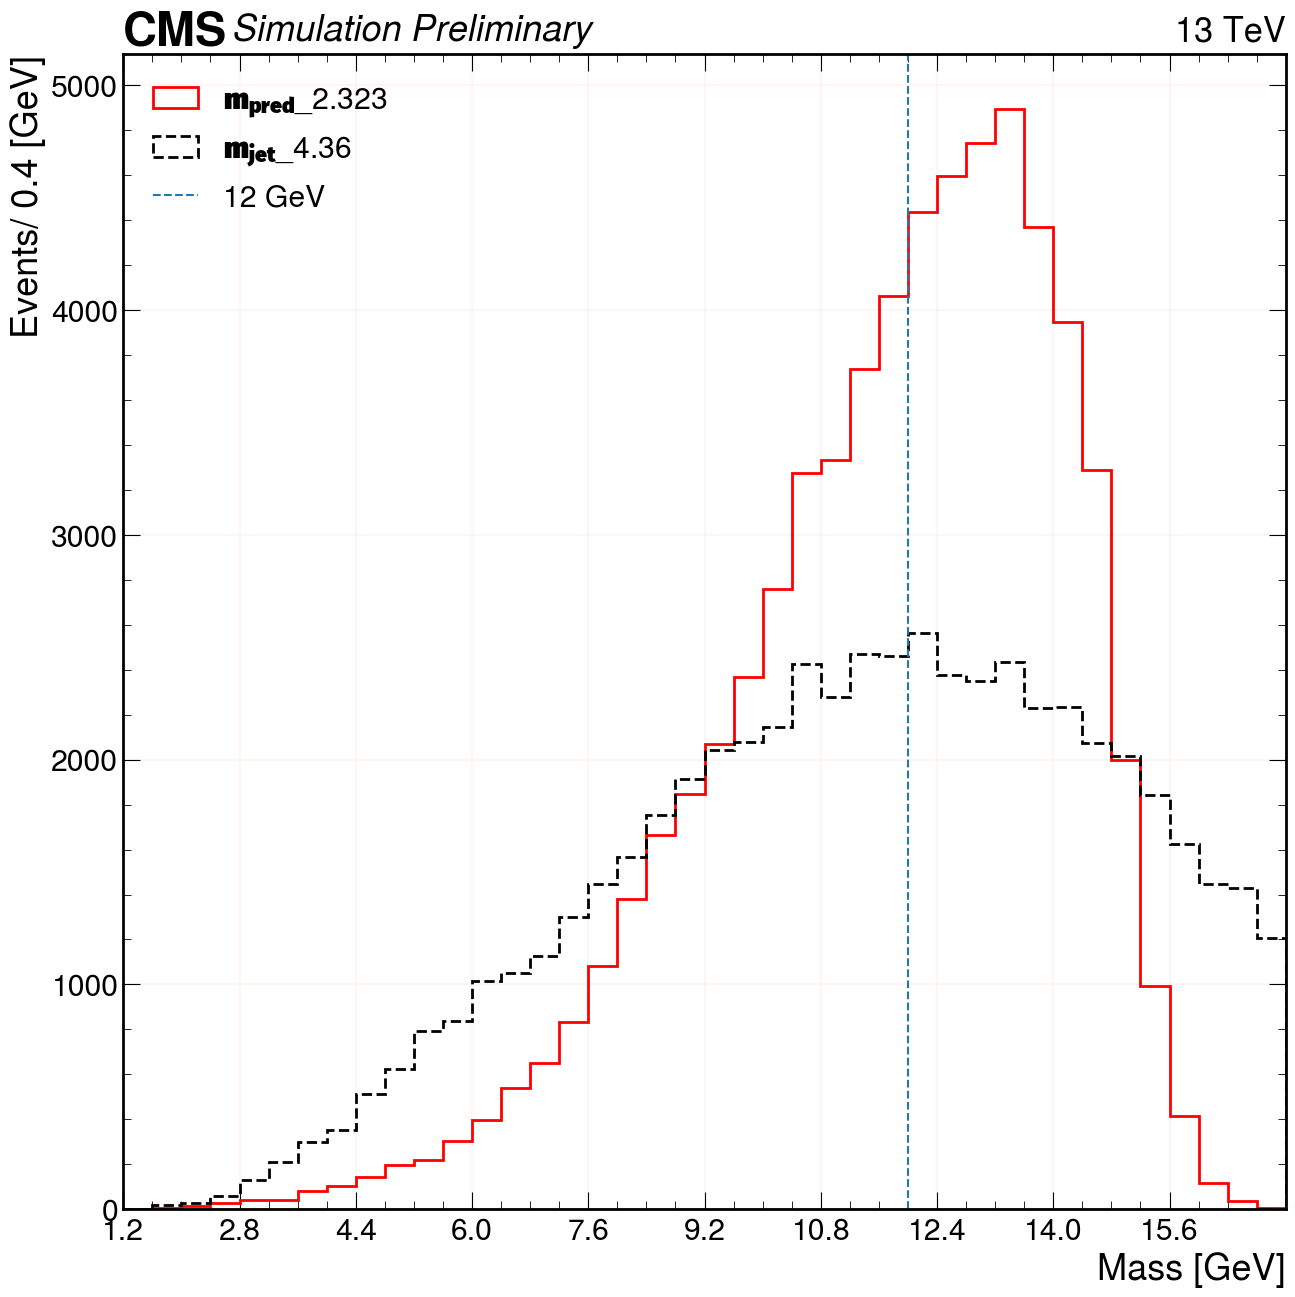

In [60]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8464_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 12,linestyle='--',label=f'12 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal M=14 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8898_inference_data.pkl
E2E MAE   : 2.321419623631475
PF MAE   : 5.278748017229146


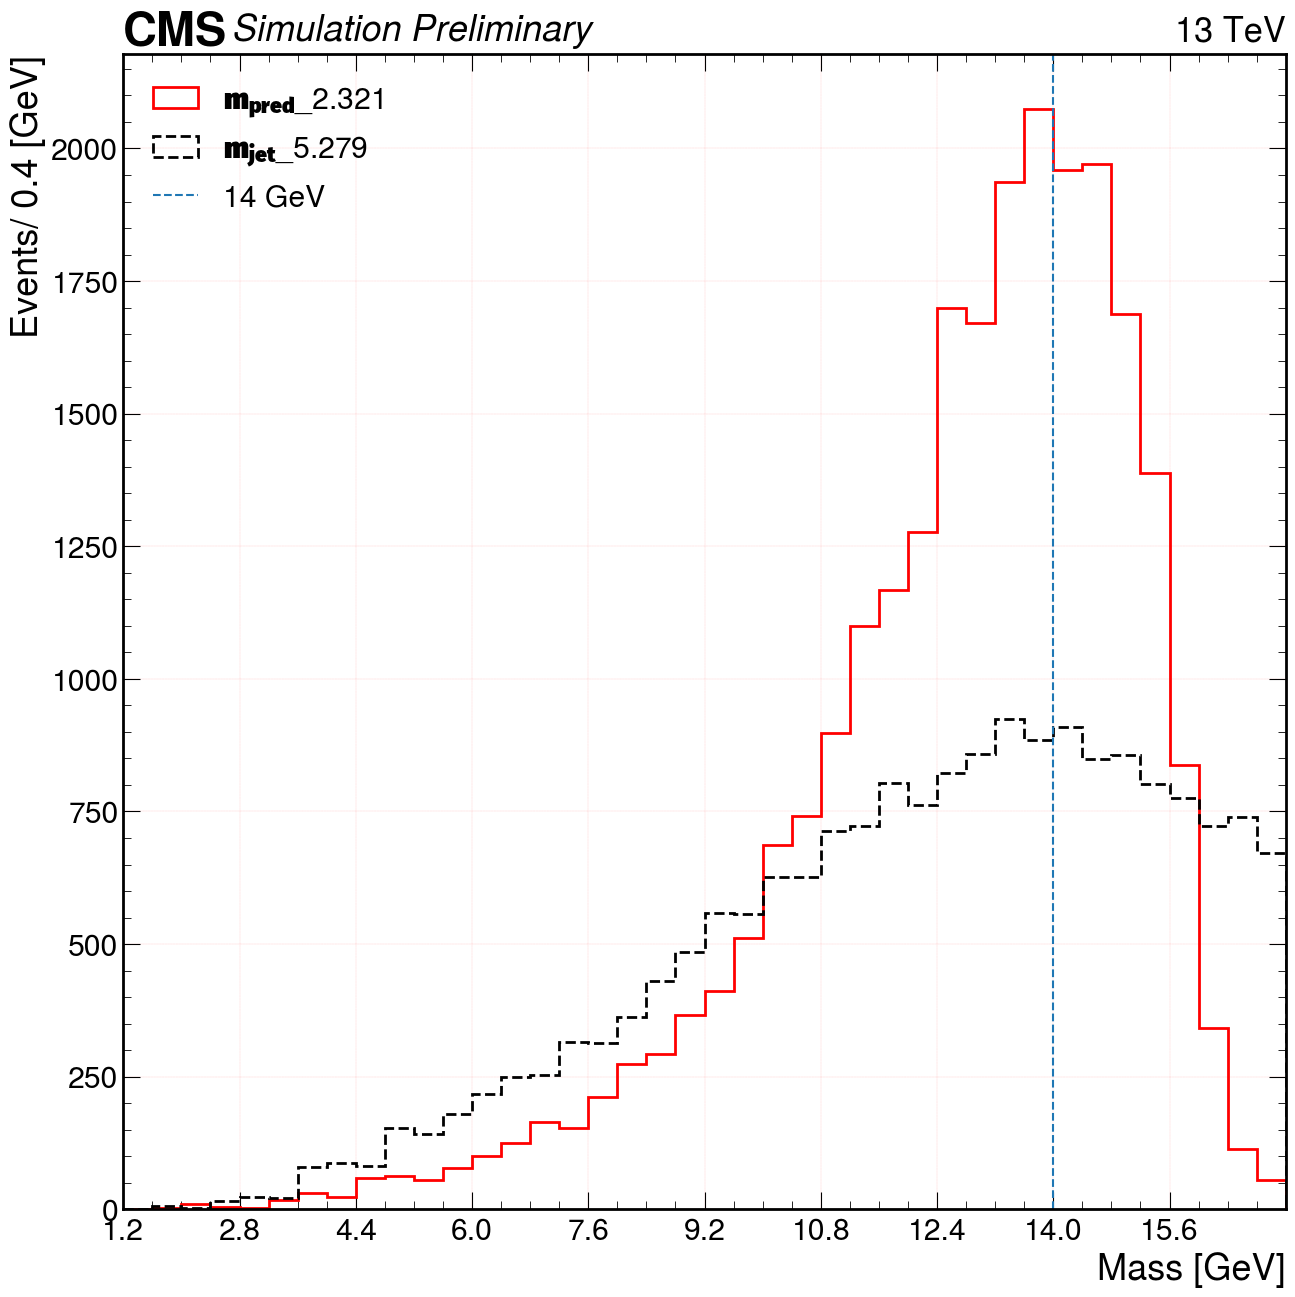

In [61]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8898_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 14,linestyle='--',label=f'14 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# ---- mass_trainer_aToTauTau_m1p2To17p2_v2_13ch ---

# U to 2tau validation sample

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch9_val_pseudoscalar_mae2.0971_inference_data.pkl
E2E MAE   : 2.242693300318089
PF MAE   : 4.181490569139901


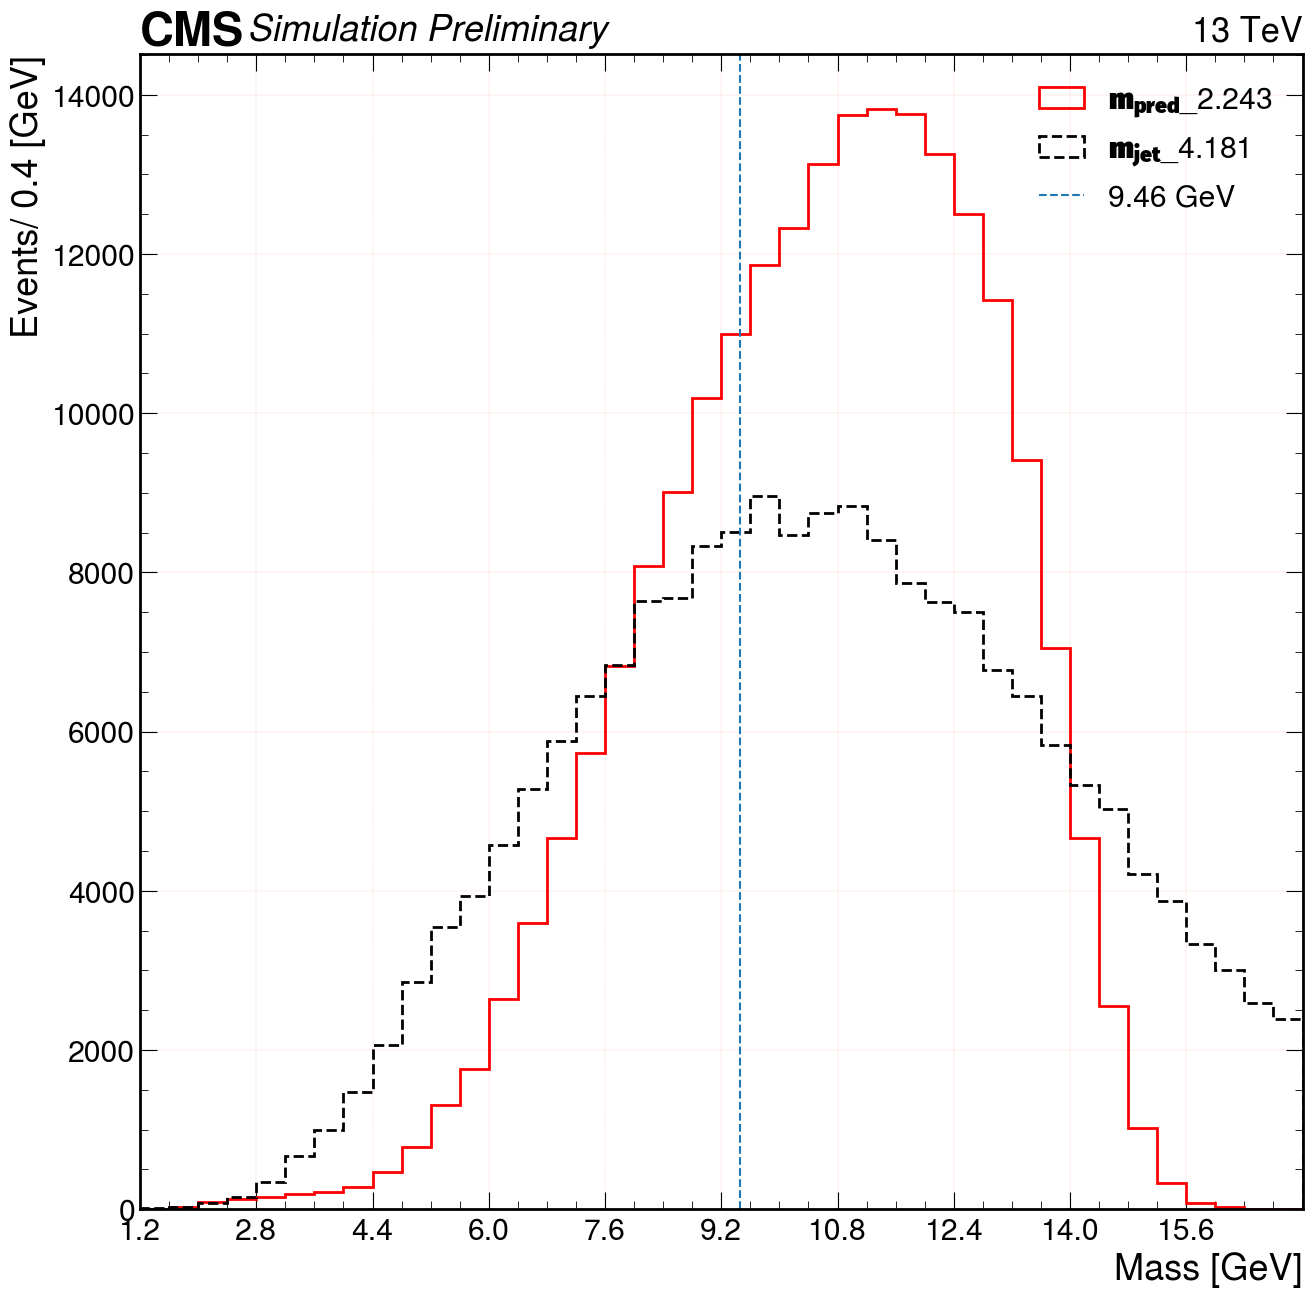

In [62]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch9_val_pseudoscalar_mae2.0971_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Signal Mass=3.7 GeV

In [ ]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 3.7,linestyle='--',label=f'3.7 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 4 GeV

In [ ]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 4,linestyle='--',label=f'4 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 5 GeV

In [ ]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 5,linestyle='--',label=f'5 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal M = 6 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl
E2E MAE   : 1.8088991173454665
PF MAE   : 3.647170325161912


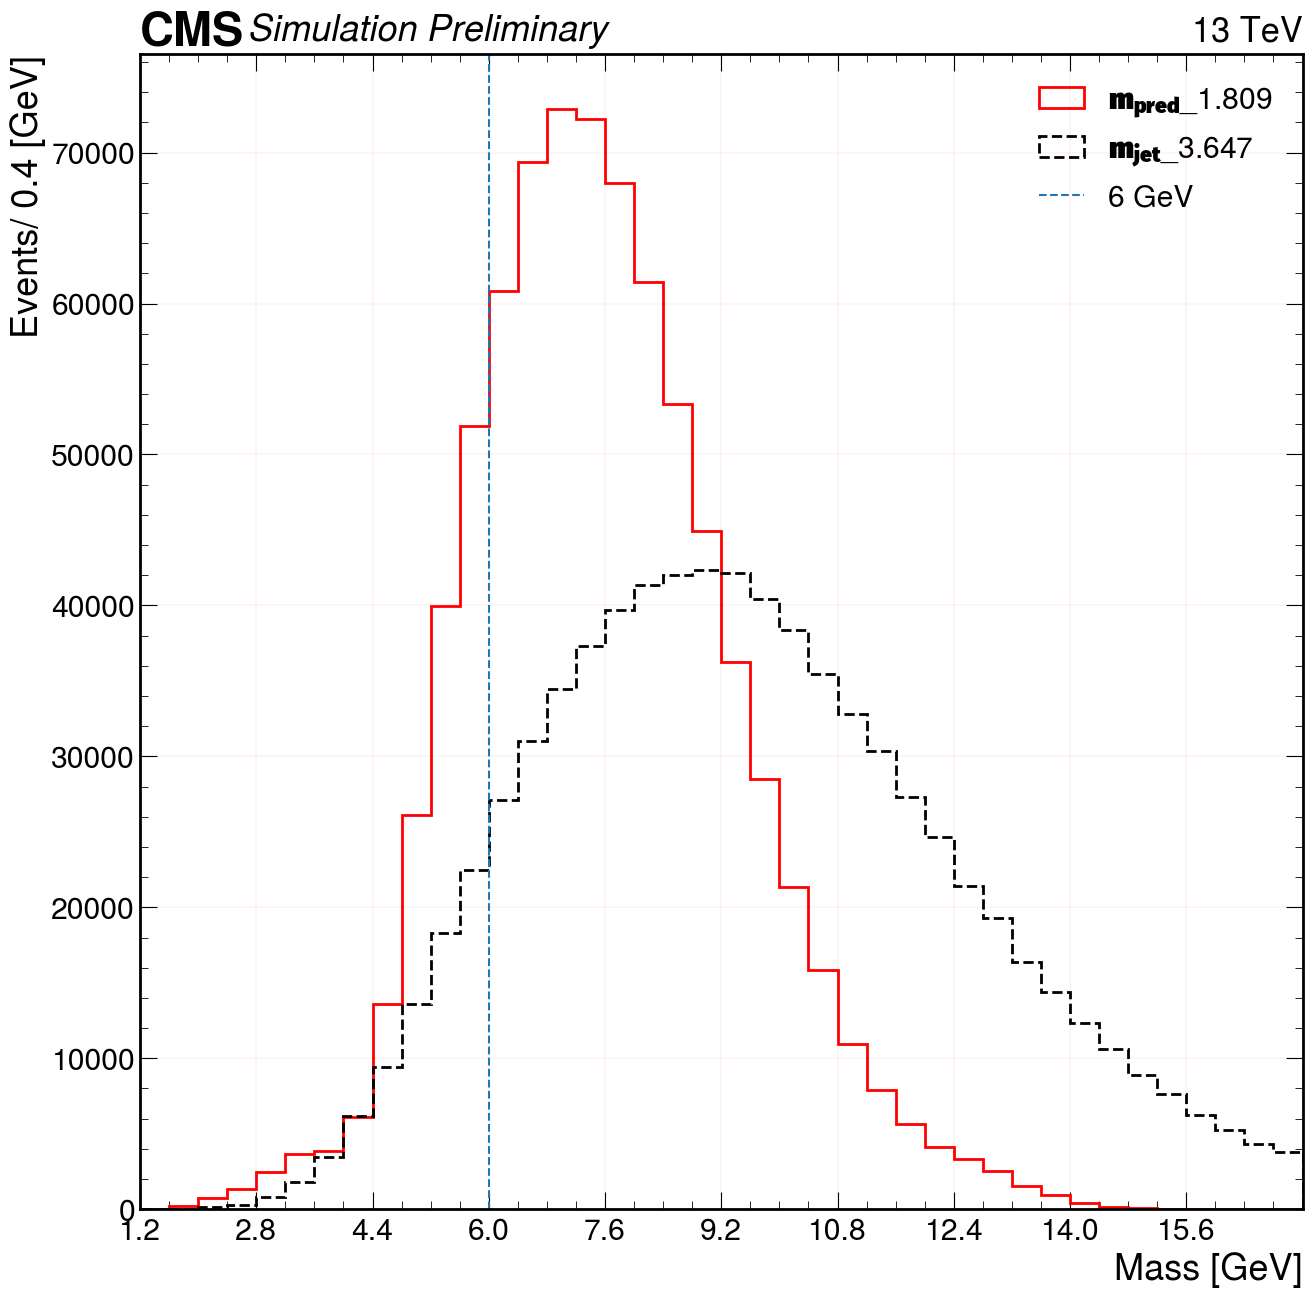

In [63]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 6,linestyle='--',label=f'6 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal M = 8 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9087_inference_data.pkl
E2E MAE   : 1.966254570670216
PF MAE   : 3.5492138309283288


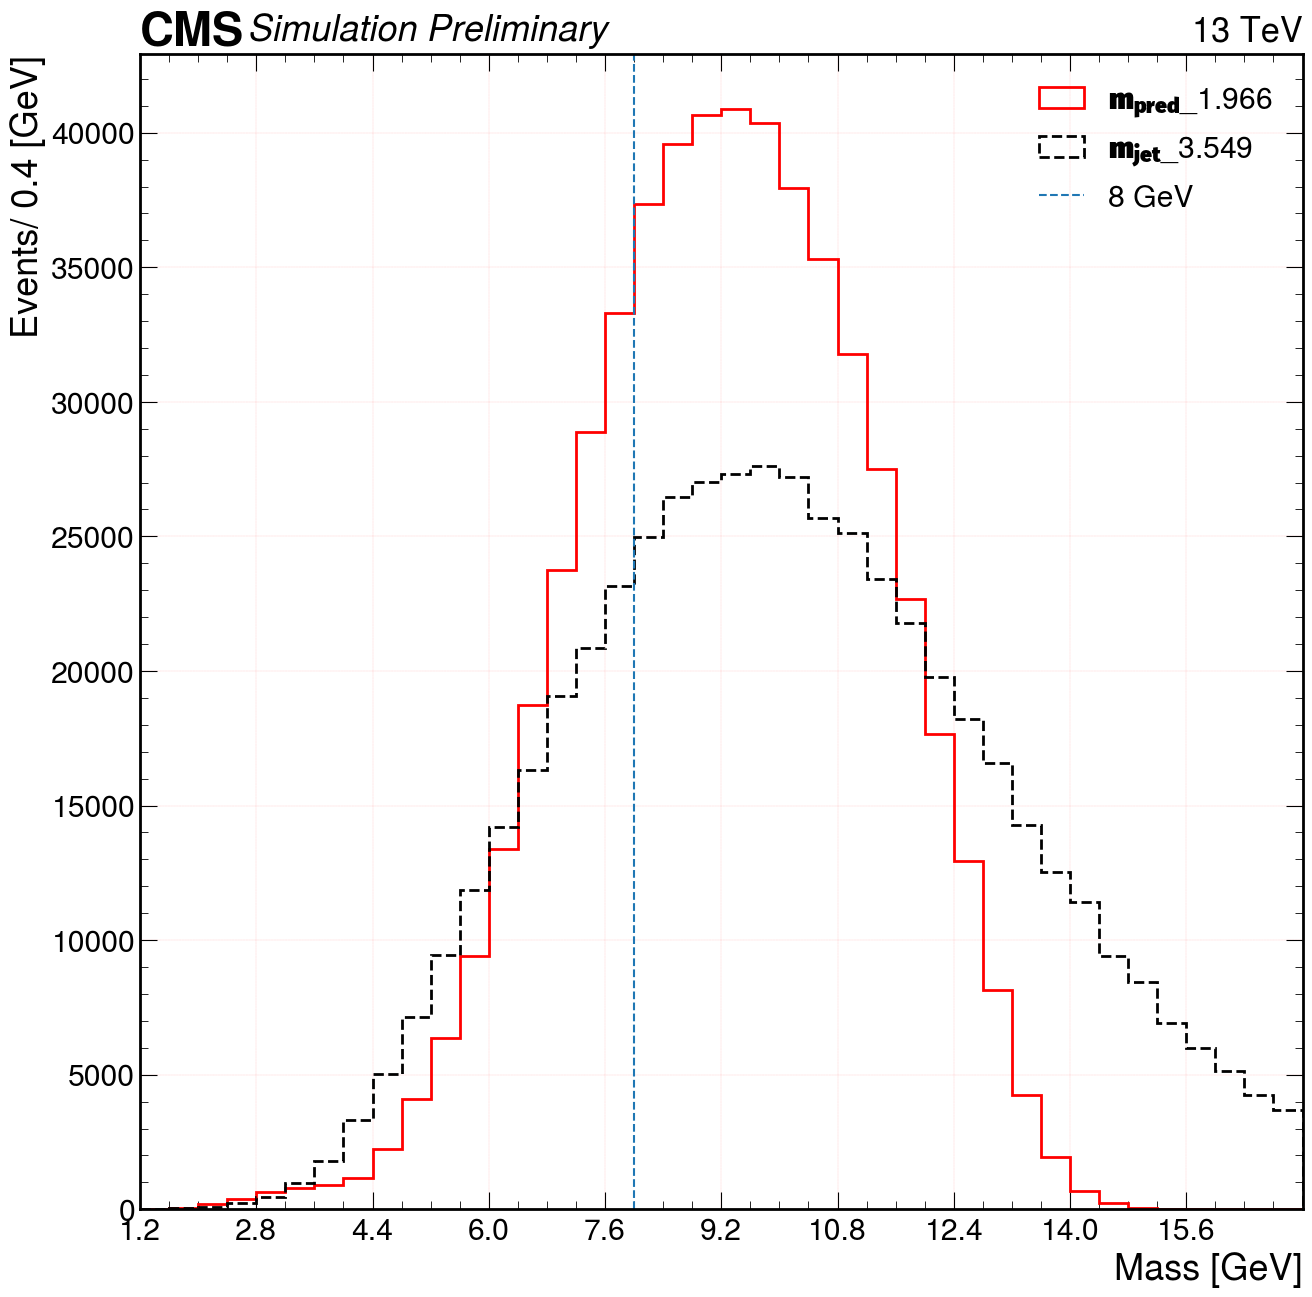

In [64]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9087_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 8,linestyle='--',label=f'8 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass =10 Gev

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch9_val_pseudoscalar_mae2.1142_inference_data.pkl
E2E MAE   : 2.1968229517396005
PF MAE   : 3.726214751308531


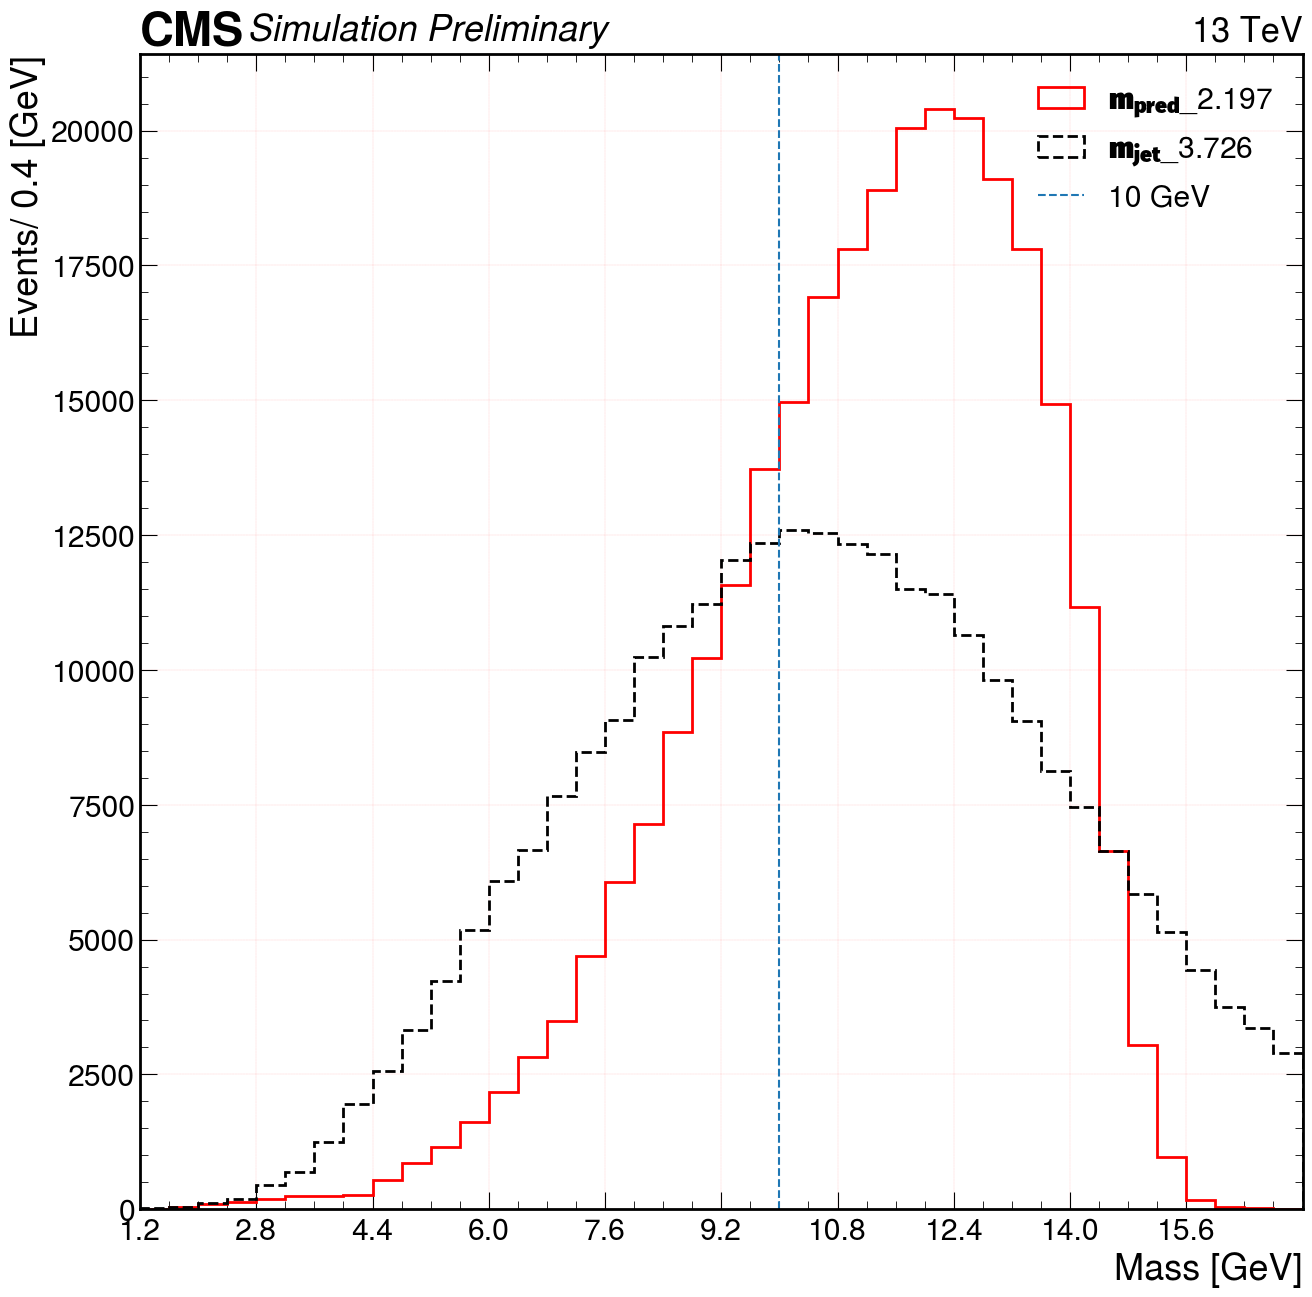

In [65]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch9_val_pseudoscalar_mae2.1142_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 10,linestyle='--',label=f'10 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass= 12 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.6734_inference_data.pkl
E2E MAE   : 2.100961106450484
PF MAE   : 4.466406247537872


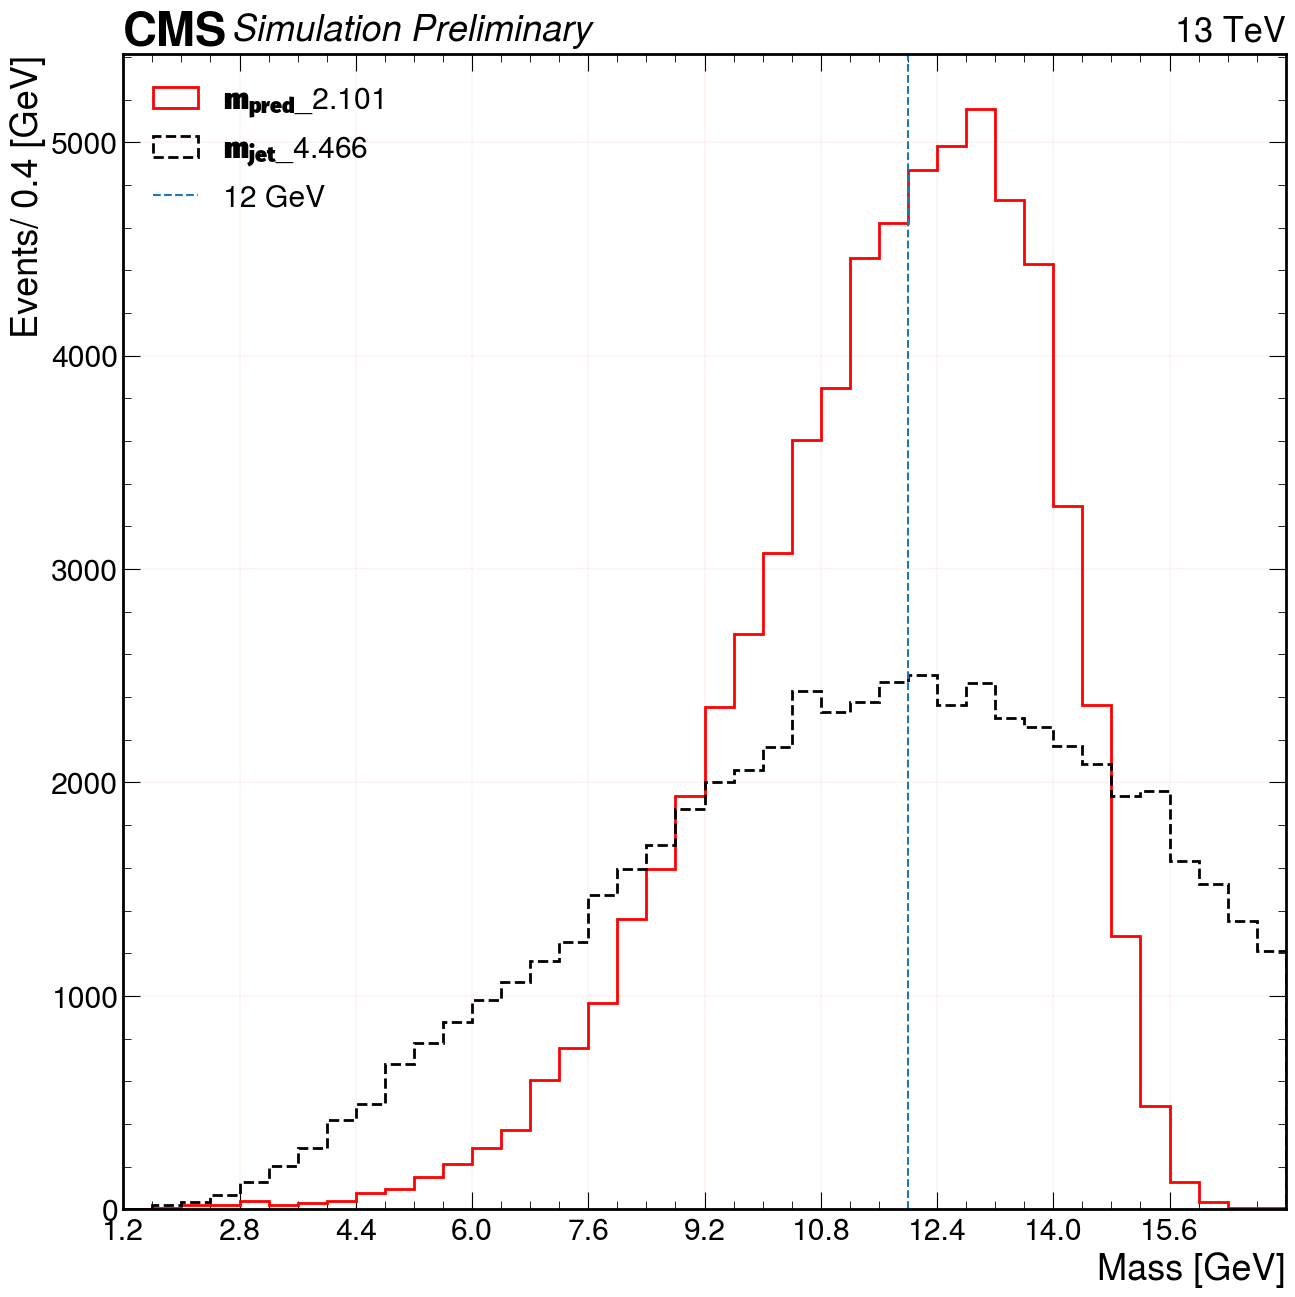

In [67]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.6734_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 12,linestyle='--',label=f'12 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass 14 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.7857_inference_data.pkl
E2E MAE   : 2.0583848076371263
PF MAE   : 5.016145829088144


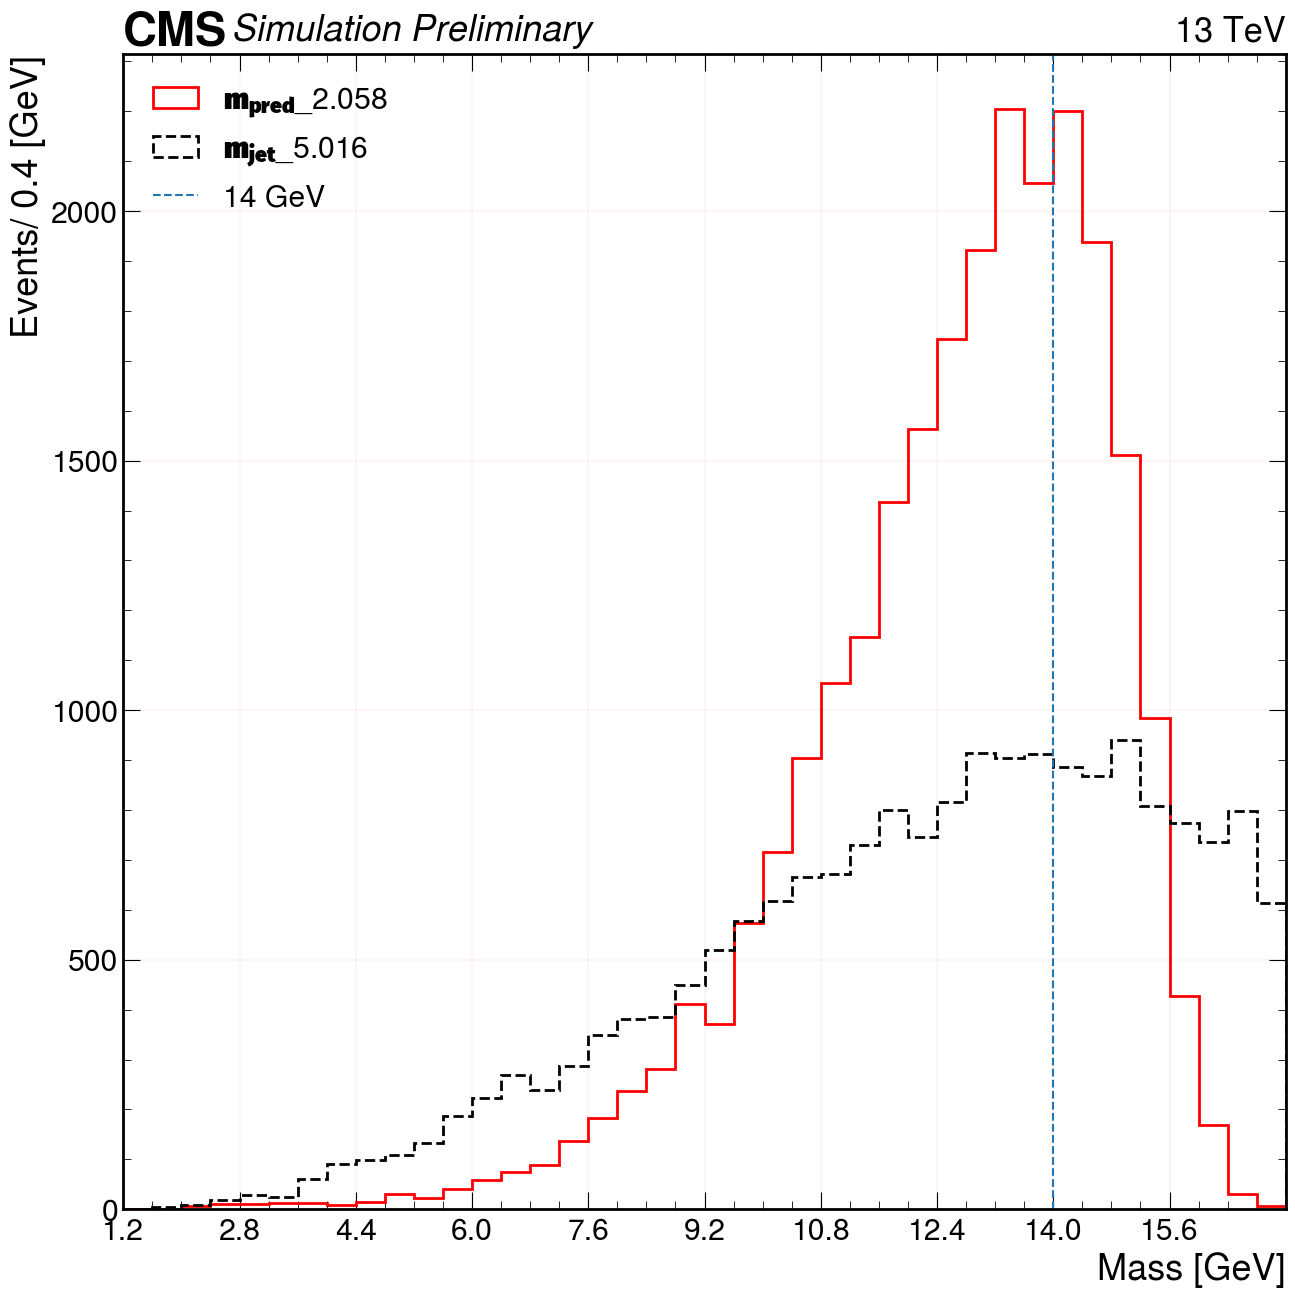

In [68]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.7857_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
jet_mass = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 14,linestyle='--',label=f'14 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()